In [1]:
import numpy as np

from sklearn import svm
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from skimage.io import imshow
import matplotlib.image as mpimg
#%matplotlib inline
import seaborn as sns

In [2]:
# Input data files consisting of the images
pics = np.load("olivetti_faces.npy")
labels = np.load("olivetti_faces_target.npy")

In [3]:
print("pics: ", pics.shape)  #400 imagens de 64pixeis x 64pixeis
print("labels: ", labels.shape)

pics:  (400, 64, 64)
labels:  (400,)


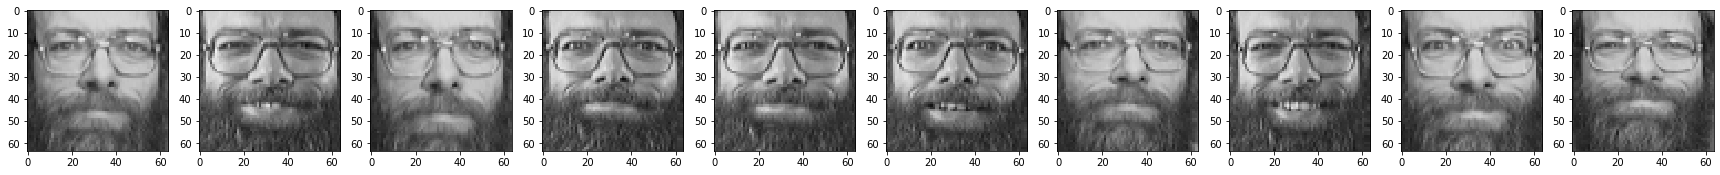

In [4]:
# Sample images of a subject
img_cnt = 10
plt.figure(figsize=(24,24))
for i in range(img_cnt):
    plt.subplot(1,10,i+1)
    x=pics[i+360] # 4th subject
    imshow(x)
plt.show()

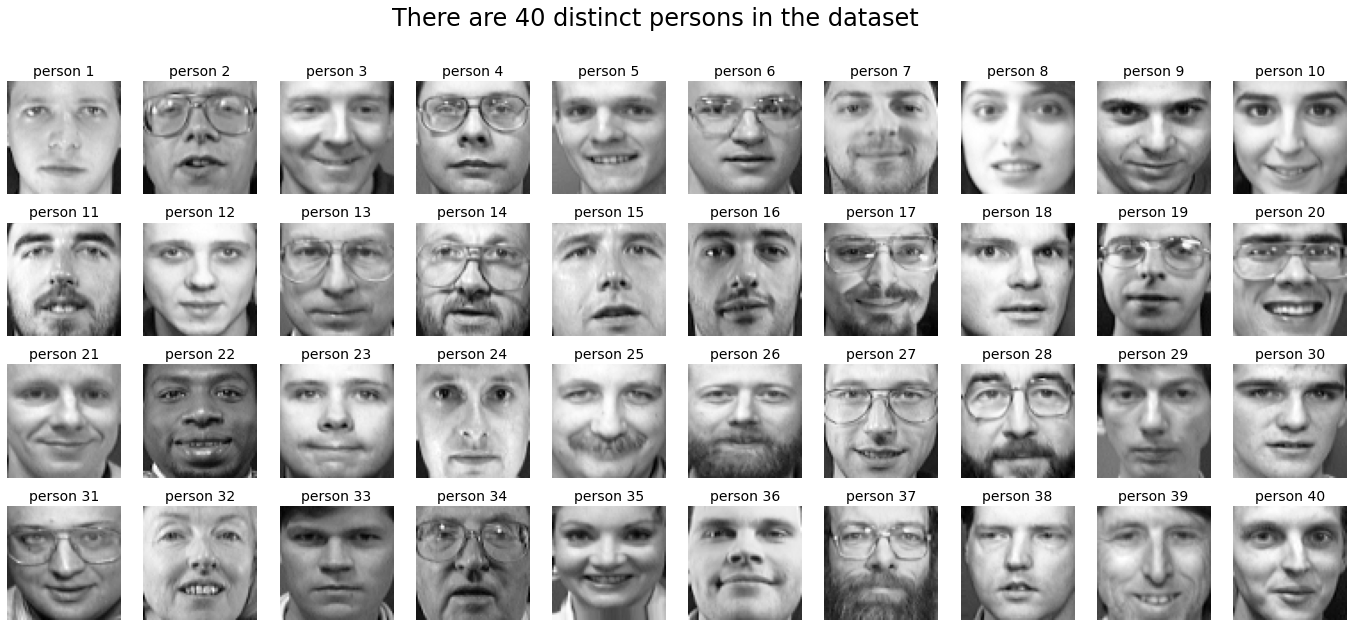

In [5]:
fig = plt.figure(figsize=(24, 10))
columns = 10
rows = 4
for i in range(1, columns*rows +1):
    img = pics[10*(i-1),:,:]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap = plt.get_cmap('gray'))
    plt.title("person {}".format(i), fontsize=14)
    plt.axis('off')
    
plt.suptitle("There are 40 distinct persons in the dataset", fontsize=24)
plt.show()

In [6]:
Y = labels
X=pics.reshape(pics.shape[0], pics.shape[1]*pics.shape[2]) # reshape and store images in X

print("X shape:",X.shape)
print("Y shape:",Y.shape)

X shape: (400, 4096)
Y shape: (400,)


In [9]:
#Split data for train and test purposes
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.35, random_state=46)

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (260, 4096)
x_test:  (140, 4096)
y_train:  (260,)
y_test:  (140,)


In [10]:
# plotting the predicted values along with true values
def plot_gallery(images,titles,h,w,row=3,col=11):
    plt.figure(figsize=(1.4*col,2*row))
    plt.subplots_adjust(bottom=0,left=0.1,right=.99,top=0.80,hspace=.35)
    for i in range(33):
        plt.subplot(row,col,i+1)
        plt.imshow(images[i].reshape((64,64)),cmap=plt.cm.bone)
        plt.title(titles[i],size=12)
        plt.xticks([])
        plt.yticks([])
def title(y_pred,y_test,i):
    return 'predicted: %s\n true: %s'%(y_pred[i],y_test[i])

# funtion for plotting important elements
def plotting_fig(s):
    fig=plt.figure(figsize=(7,7))
    for i in range(49):
        ax=fig.add_subplot(7,7,i+1)
        ax.imshow(s[i], cmap=plt.cm.bone)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

In [11]:
clf=svm.SVC()
grid={"C":[1e2, 1e3, 5e3, 1e4, 5e4, 1e5], "gamma": [1e-3, 5e-4, 1e-4, 5e-3]}

abc=GridSearchCV(clf,grid)
abc.fit(x_train, y_train)
pred=abc.predict(x_test)
abc.best_estimator_




/home/renato/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


SVC(C=100.0, gamma=0.005)

In [12]:
print(y_test)
print(pred)
class_name = ('0', '1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39')


[34 15  8 12 31 27 17 25 34 28 30 35 23 10 37 10 11  1 26 25  0 17 39 32
 33 15 17 26  8 34  0 14 18 19 28  5 29  7 37 14 29 13 11 24 29  4  4 11
 21 13 25 27 36 24 33 19  7  5 26 14 35 12 11 38  0 26 31 38  3 34 13 36
 18 20 10  1 32  3 23  3 22 10 28  5 27  1 39 14  4  3  7 39 10 30 35  1
 30 38  1 20  1 10  9 21 30 35 24 11 21 15 30  2 26 21 36  6 17 32 11  6
 20 18  7  2 33 28  6 13 15 16  5 25 38 37 22 37 21 16 39 14]
[20  6  8  3 31 27 17 25 34 28 30 35 23 10 37 10 11  1 26 22  0 17 39 32
 33 15 17 26  8 34  0 14 18 19 28  5 29  7 37 14 29 13 11 24 29  4  4 11
 21 13 25 27 36 24 33 19  7  5 26 14 35 12 11 38  0 26 31 38  3 34 13 36
 18 20 10  1 32  3 23 22 22 10 28  5 27  1  0 14  4  3  7 39 10 30 35  1
 30 38  1 20  1 10  9 21 30 35 24 11 21  6 30  2 26 21 36  6 17 32 11  6
 20 18  0  2 33 28  6 13  0 16  5 25 38 37 22 37 21 16 39 14]


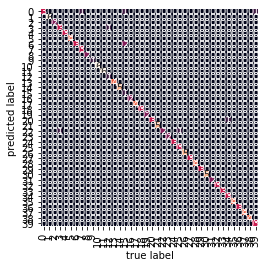

In [13]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=class_name,
            yticklabels=class_name)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [47]:
#import matplotlib.pyplot as plt  
#from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
#from sklearn.model_selection import train_test_split
#from sklearn.svm import SVC

In [48]:
# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01).fit(x_train, y_train)


Confusion matrix, without normalization
[[1 0 1 ... 0 0 0]
 [0 6 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 1 ... 4 0 1]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 0]]
Normalized confusion matrix
[[0.17 0.   0.17 ... 0.   0.   0.  ]
 [0.   1.   0.   ... 0.   0.   0.  ]
 [0.   0.   1.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.17 ... 0.67 0.   0.17]
 [0.   0.   0.   ... 0.   1.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]]


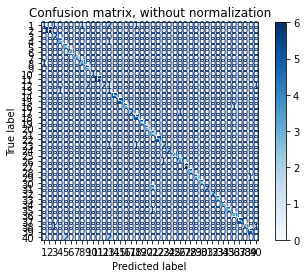

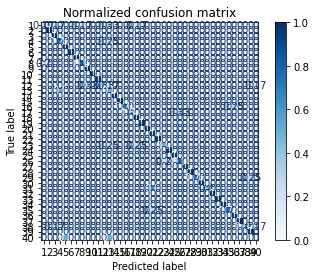

In [49]:
class_name = ('0', '1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39')

np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x_test, y_test,
                                 display_labels=class_name,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [51]:
print(x_test.shape)
print(pred.shape)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred, labels=range(40)))
plot_confusion_matrix(y_test, pred, labels=range(40))
plt.show() 

(160, 4096)
(160,)
[[1 0 0 ... 0 0 0]
 [0 6 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 6 0 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 3]]


TypeError: plot_confusion_matrix() missing 1 required positional argument: 'y_true'

In [52]:
import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [53]:
# Imports
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

print(x_test.shape)
print(pred.shape)
print(confusion_matrix(y_test, pred, labels=range(40)))


(160, 4096)
(160,)
[[1 0 0 ... 0 0 0]
 [0 6 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 6 0 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 3]]


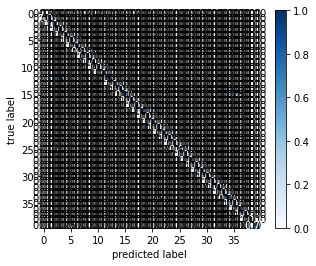

In [55]:

#plt.figure(figsize=(20,20))
cm = np.array(confusion_matrix(y_test, pred, labels=range(40)))

figure, ax = plot_confusion_matrix(conf_mat = cm,
                                   #class_names = classes,
                                   show_absolute = False,
                                   show_normed = True,
                                   colorbar = True)

from matplotlib.pyplot import figure

#figure(figsize=(8, 6), dpi=80)
plt.show()

#plot_confusion_matrix(y_test, pred, labels=range(40))
#plt.show() 

In [56]:
#SVC(random_state=0)
plt.figure(figsize=(50,50))
plot_confusion_matrix(abc, x_test, pred)  
plt.show()  

#plt.figure(figsize=(20,20))
#plot_confusion_matrix(rounded_labels, predicted_classes, classes = class_name, title='Non-Normalized Confusion matrix')
#plt.show()

#cm = np.array(confusion_matrix(y_test, pred, labels=range(40)))


AttributeError: 'GridSearchCV' object has no attribute 'sum'

<Figure size 3600x3600 with 0 Axes>

In [61]:
class_name = ('0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39')
rounded_labels=np.argmax(x_test, axis=1)
plt.figure(figsize=(20,20))
plot_confusion_matrix(rounded_labels, pred, classes = class_name, title='Non-Normalized Confusion matrix')
plt.show()

TypeError: plot_confusion_matrix() got an unexpected keyword argument 'classes'

<Figure size 1440x1440 with 0 Axes>

In [62]:
print('Accuracy score is ',abc.score(x_test,y_test)*100)

Accuracy score is  92.5


In [63]:
#showing comparison of actual values with predicted ones
prediction = [title(pred,y_test,i) for i in range(pred.shape[0])]
plot_gallery(x_test,prediction,64,64)

TypeError: 'str' object is not callable

In [64]:
#With pca

from sklearn.decomposition import PCA

# running principle component analysis for finding number of components
pca=PCA()
pca.fit(x_train)

# calculating number of features to be kept for 95% variance
k=0
total=sum(pca.explained_variance_)
print(total)
current_sum=0

while current_sum/total<0.95:
    current_sum+=pca.explained_variance_[k]
    k=k+1
print(k)

76.92231918970973
96


In [65]:
# running PCA provided with number of components to retain
pca=PCA(n_components=k,whiten= True)
x_transformed=pca.fit_transform(x_train)
x_train_pca=x_transformed
print(x_train.shape)
print(x_train_pca.shape)


x_test_pca= pca.transform(x_test)
print(x_test.shape)
print(x_test_pca.shape)

(240, 4096)
(240, 96)
(160, 4096)
(160, 96)


In [66]:
x_approx= pca.inverse_transform(x_transformed)
x_approx= x_approx.reshape((320,64,64))

ValueError: cannot reshape array of size 983040 into shape (320,64,64)

TypeError: Invalid shape (4096,) for image data

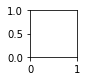

In [67]:
plotting_fig(x_approx)      # images after keeping only 95% of varience

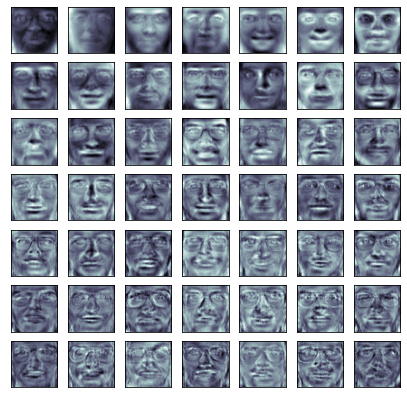

In [68]:
eig_v= pca.components_.reshape((k,64,64))   # regenerated images from principle components only
plotting_fig(eig_v)

In [69]:
clf=svm.SVC()
grid={"C":[1e2, 1e3, 5e3, 1e4, 5e4, 1e5], "gamma": [1e-3, 5e-4, 1e-4, 5e-3]}

abc2=GridSearchCV(clf,grid)
abc2.fit(x_train_pca, y_train)
pred2=abc2.predict(x_test_pca)
abc2.best_estimator_


/home/renato/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


SVC(C=100.0, gamma=0.001)

In [70]:
print('Accuracy score is ',abc2.score(x_test_pca,y_test)*100)

Accuracy score is  91.25


In [71]:
#showing comparison of actual values with predicted ones
prediction = [title(pred2,y_test,i) for i in range(pred.shape[0])]
plot_gallery(x_test,prediction,64,64)

TypeError: 'str' object is not callable

In [72]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

NameError: name 'sns' is not defined

In [73]:
import matplotlib.pyplot as plt  
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

SVC(random_state=0)
plot_confusion_matrix(clf, y_test, pred)  
plt.show()  

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.